In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import statsmodels.api as sm

In [3]:
flc = '/Users/pinqingkan/Desktop/Codes/Course_ISLR/data/'
fname = flc + 'Auto.data'

In [4]:
X0 = pd.read_csv(fname, sep = '\s+')
Nrow, Ncol = X0.shape

In [5]:
X0.describe(include = 'all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,397.000000,397.000000,397.000000,397,397.000000,397.000000,397.000000,397.000000,397
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,304
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.515869,5.458438,193.532746,NaN,2970.261965,15.555668,75.994962,1.574307,NaN
std,7.825804,1.701577,104.379583,NaN,847.904119,2.749995,3.690005,0.802549,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.000000,NaN,2223.000000,13.800000,73.000000,1.000000,NaN
50%,23.000000,4.000000,146.000000,NaN,2800.000000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3609.000000,17.100000,79.000000,2.000000,NaN


In [6]:
# some rows in 'horsepower' can't be converted to floats (missing data), disregard
X = X0.copy()
for i in range(Nrow):
    try:
        float(X0.loc[i, 'horsepower'])
    except ValueError:
        X = X.drop([i], axis = 0)
X['horsepower'] = X['horsepower'].astype(float)

In [7]:
X = X.dropna(axis = 0, how = 'any')
Nrow, Ncol = X.shape

8 - (a) perform a simple linear regression with mpg as the response and horsepower as the predictor

In [8]:
xx = X.horsepower.copy()
xx = sm.add_constant(xx) # OLS does not include intercept by default
yy = X.mpg.copy()
results = sm.OLS(yy, xx).fit()

In [9]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 02 Aug 2018   Prob (F-statistic):           7.03e-81
Time:                        21:12:54   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [10]:
x2 = pd.DataFrame(data = {'const': [1], 'horsepower': [95]})
results.predict(x2)

0    24.940611
dtype: float64

In [11]:
results.get_prediction(x2).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.940611,0.255185,24.438901,25.442321,15.282533,34.59869


8 - (b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.

<Figure size 432x288 with 0 Axes>

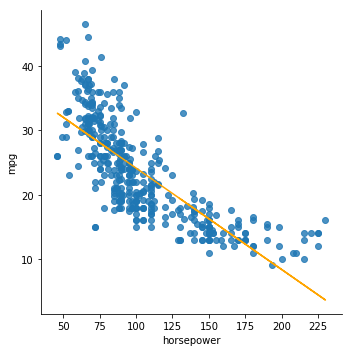

In [12]:
# visualize the linear fit on the training data
plt.figure()
sns.lmplot(x = 'horsepower', y = 'mpg', data=X, fit_reg=False)
plt.plot(X.horsepower, results.predict(xx), 'orange')

8 - (c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

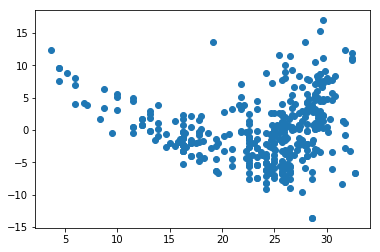

In [13]:
residuals = results.resid
# residual plot
plt.scatter(results.predict(xx), residuals)

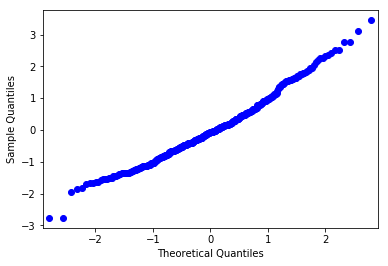

In [14]:
fig = sm.qqplot(results.resid_pearson)
plt.show()

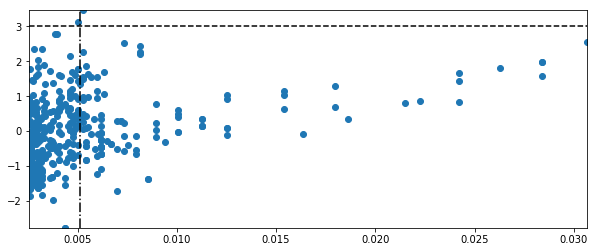

In [15]:
infl = results.get_influence()
resd_std = infl.resid_studentized_internal
hatDiag  = infl.hat_diag_factor
hi0 = 2 / Nrow # p = 1, n = Nrow
plt.figure(figsize = (10, 4))
plt.scatter(hatDiag, resd_std)
plt.plot([1/Nrow, max(hatDiag)], [-3, -3], '--k')
plt.plot([1/Nrow, max(hatDiag)], [3, 3], '--k')
plt.plot([hi0, hi0], [min(resd_std), max(resd_std)], '-.k')
ax = plt.axis([1/Nrow, max(hatDiag), min(resd_std), max(resd_std)])